## 1. Import Necessary Libraries

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## 2. Loading the QMNIST Dataset

In [5]:
# Load QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

In [6]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

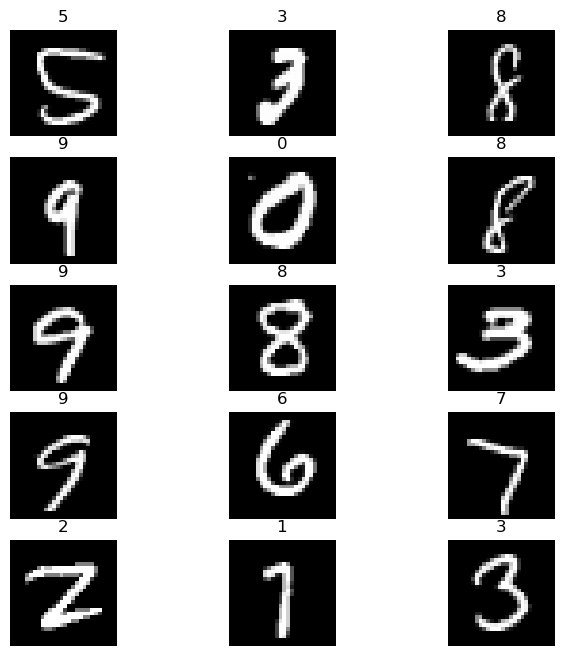

In [7]:
# Visualize some images from the dataset
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5", 
    6: "6", 
    7: "7", 
    8: "8", 
    9: "9"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

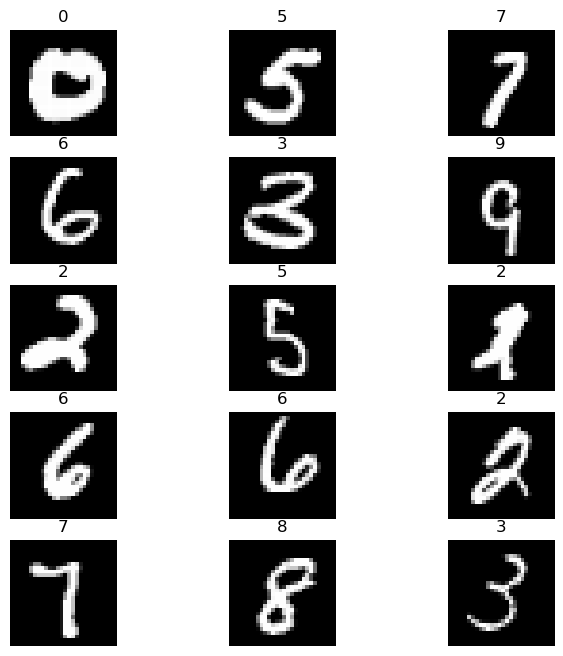

In [8]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 3. Results in terms of prediction accuracy on the train and test datasets

#### Default: The neural network architecture with 3 fully connected layers (128, 64, 10) and ReLU activation for the hidden layers

In [11]:
# Define the neural network architecture with an additional Dense layer
class MLP2(nn.Module):
    def __init__(self):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model2 = MLP2()

In [12]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0470861297845842
Epoch 1, Batch 200, Loss: 0.44545826092362406
Epoch 1, Batch 300, Loss: 0.3810336108505726
Epoch 1, Batch 400, Loss: 0.3196304795891047
Epoch 1, Batch 500, Loss: 0.3122585408389568
Epoch 1, Batch 600, Loss: 0.3178394331037998
Epoch 1, Batch 700, Loss: 0.2915863785147667
Epoch 1, Batch 800, Loss: 0.26243430234491827
Epoch 1, Batch 900, Loss: 0.2487815634906292
Epoch 2, Batch 100, Loss: 0.22806412883102894
Epoch 2, Batch 200, Loss: 0.2105530995503068
Epoch 2, Batch 300, Loss: 0.21522780768573285
Epoch 2, Batch 400, Loss: 0.19863542772829532
Epoch 2, Batch 500, Loss: 0.20492270961403847
Epoch 2, Batch 600, Loss: 0.17361355245113372
Epoch 2, Batch 700, Loss: 0.18954972576349974
Epoch 2, Batch 800, Loss: 0.16654660720378162
Epoch 2, Batch 900, Loss: 0.16148521348834038
Epoch 3, Batch 100, Loss: 0.15837379418313502
Epoch 3, Batch 200, Loss: 0.15081154629588128
Epoch 3, Batch 300, Loss: 0.13549171878024935
Epoch 3, Batch 400, Loss: 0.13818990955129

In [14]:
# Evaluate the model on train dataset
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: {100 * correct / total:.2f}%')

Accuracy on train set: 97.34%


In [13]:
# Evaluate the model on test dataset
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

Accuracy on test set: 96.21%


In [15]:
# Evaluate the model and store predictions
model2.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

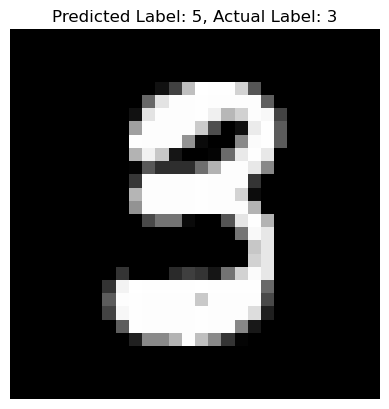

In [16]:
# Get one test image and its label
image, label = images[23], labels[23]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[23]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

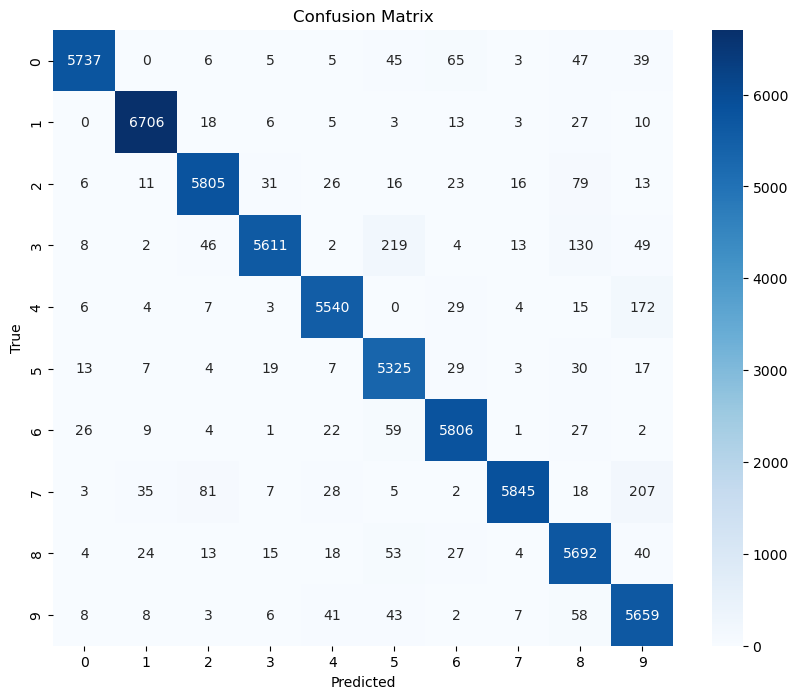

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model2, test_loader):
    y_true = []
    y_pred = []
    model2.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model2(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Call this function after training your model
plot_confusion_matrix(model2, test_loader)

## 4. Modifications and Changes in Performance Results

### 4.1. Hypothesis 1: The neural network architecture with 4 fully connected layers (128, 128, 64, 10) and ReLU activation for the hidden layers

In [20]:
# Define the neural network architecture with an additional Dense layer
class MLP1(nn.Module):
    def __init__(self):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # New layer
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # New layer
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model1 = MLP1()

In [21]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

In [22]:
# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1241
Epoch 1, Batch 200, Loss: 0.4463
Epoch 1, Batch 300, Loss: 0.4021
Epoch 1, Batch 400, Loss: 0.3354
Epoch 1, Batch 500, Loss: 0.2979
Epoch 1, Batch 600, Loss: 0.2842
Epoch 1, Batch 700, Loss: 0.2564
Epoch 1, Batch 800, Loss: 0.2352
Epoch 1, Batch 900, Loss: 0.2252
Epoch 2, Batch 100, Loss: 0.2000
Epoch 2, Batch 200, Loss: 0.1983
Epoch 2, Batch 300, Loss: 0.1959
Epoch 2, Batch 400, Loss: 0.1920
Epoch 2, Batch 500, Loss: 0.1743
Epoch 2, Batch 600, Loss: 0.1675
Epoch 2, Batch 700, Loss: 0.1637
Epoch 2, Batch 800, Loss: 0.1629
Epoch 2, Batch 900, Loss: 0.1401
Epoch 3, Batch 100, Loss: 0.1352
Epoch 3, Batch 200, Loss: 0.1444
Epoch 3, Batch 300, Loss: 0.1361
Epoch 3, Batch 400, Loss: 0.1321
Epoch 3, Batch 500, Loss: 0.1350
Epoch 3, Batch 600, Loss: 0.1232
Epoch 3, Batch 700, Loss: 0.1217
Epoch 3, Batch 800, Loss: 0.1334
Epoch 3, Batch 900, Loss: 0.1272
Epoch 4, Batch 100, Loss: 0.1039
Epoch 4, Batch 200, Loss: 0.1027
Epoch 4, Batch 300, Loss: 0.1251
Epoch 4, B

In [23]:
# Evaluate the model on train dataset
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: {100 * correct / total:.2f}%')

Accuracy on train set: 97.80%


In [24]:
# Evaluate the model
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

Accuracy on test set: 96.67%


In [25]:
# Evaluate the model and store predictions
model1.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data1 in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

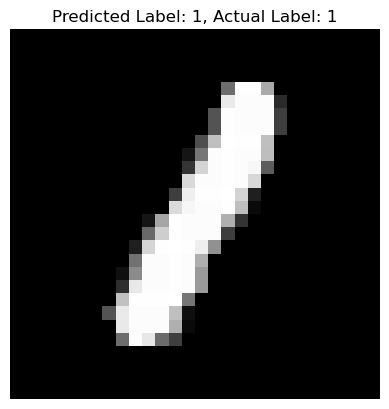

In [26]:
# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

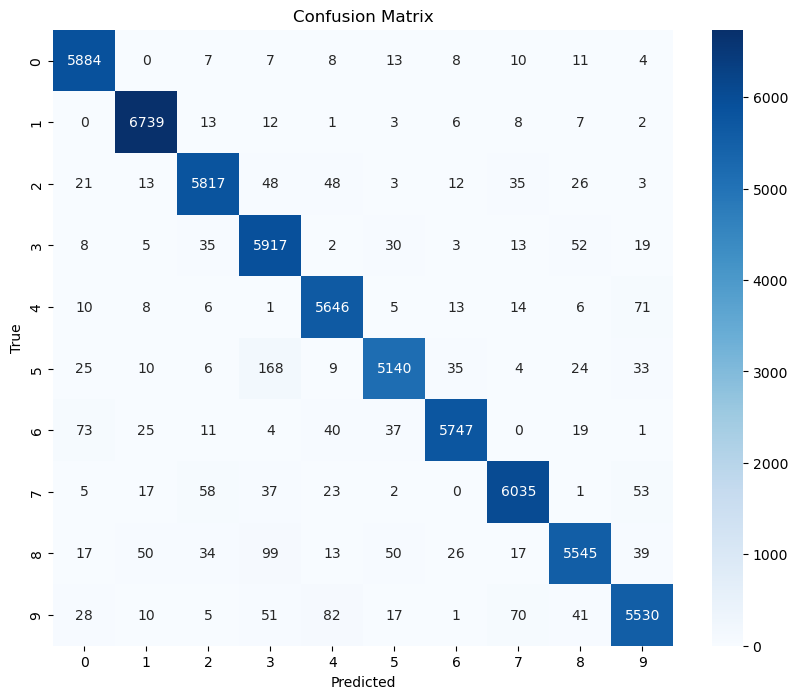

In [27]:

def plot_confusion_matrix(model, test_loader):
    y_true = []
    y_pred = []
    model1.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model1(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Call this function after training your model
plot_confusion_matrix(model1, test_loader)

### 4.2. Hypothesis 2: The neural network architecture with 4 fully connected layers (128, 128, 64, 10) with Sigmoid Activation and SGD Optimizer

In [29]:
# Define the neural network architecture with sigmoid activation
class MLP3(nn.Module):
    def __init__(self):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model3 = MLP3()

In [30]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.01, momentum=0.9)

In [31]:
# Train the neural network
num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            train_losses.append(running_loss / 100)
            running_loss = 0.0
    
print('Finished Training')

Epoch 1, Batch 100, Loss: 2.3123
Epoch 1, Batch 200, Loss: 2.3069
Epoch 1, Batch 300, Loss: 2.3064
Epoch 1, Batch 400, Loss: 2.3072
Epoch 1, Batch 500, Loss: 2.3025
Epoch 1, Batch 600, Loss: 2.3044
Epoch 1, Batch 700, Loss: 2.3027
Epoch 1, Batch 800, Loss: 2.3021
Epoch 1, Batch 900, Loss: 2.2987
Epoch 2, Batch 100, Loss: 2.2964
Epoch 2, Batch 200, Loss: 2.2936
Epoch 2, Batch 300, Loss: 2.2852
Epoch 2, Batch 400, Loss: 2.2691
Epoch 2, Batch 500, Loss: 2.2309
Epoch 2, Batch 600, Loss: 2.1405
Epoch 2, Batch 700, Loss: 2.0014
Epoch 2, Batch 800, Loss: 1.8692
Epoch 2, Batch 900, Loss: 1.7589
Epoch 3, Batch 100, Loss: 1.6031
Epoch 3, Batch 200, Loss: 1.4500
Epoch 3, Batch 300, Loss: 1.3134
Epoch 3, Batch 400, Loss: 1.2468
Epoch 3, Batch 500, Loss: 1.1868
Epoch 3, Batch 600, Loss: 1.1513
Epoch 3, Batch 700, Loss: 1.0873
Epoch 3, Batch 800, Loss: 1.0383
Epoch 3, Batch 900, Loss: 0.9859
Epoch 4, Batch 100, Loss: 0.9075
Epoch 4, Batch 200, Loss: 0.8178
Epoch 4, Batch 300, Loss: 0.7656
Epoch 4, B

In [32]:
# Evaluate the model on train dataset
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: {100 * correct / total:.2f}%')

Accuracy on train set: 95.30%


In [33]:
# Evaluate the model after each epoch
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
accuracy = 100 * correct / total
test_accuracies.append(accuracy)
print(f'Accuracy on test set: {accuracy:.2f}%')

Accuracy on test set: 94.35%


Text(0, 0.5, 'Loss')

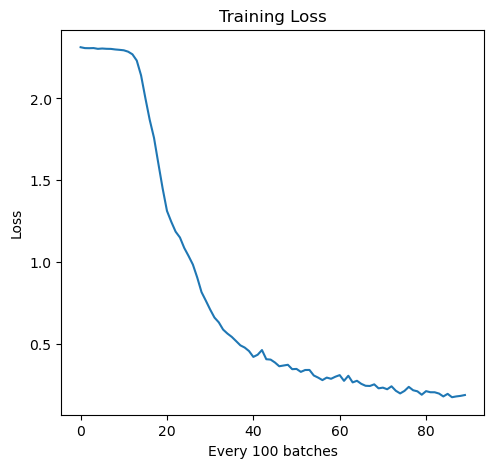

In [34]:
# Plot training loss and test accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Every 100 batches')
plt.ylabel('Loss')

In [35]:
# Visualize a prediction
model3.eval()
predictions = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        break  # We only need one batch for visualization

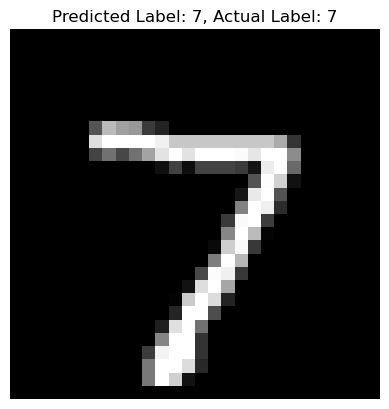

In [36]:
# Get one test image and its label
image, label = images[0], labels[0]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[0]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

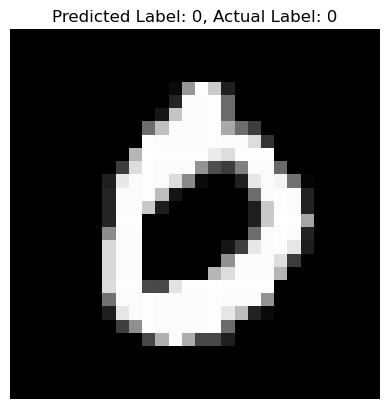

In [37]:
# Get one test image and its label
image, label = images[3], labels[3]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[3]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

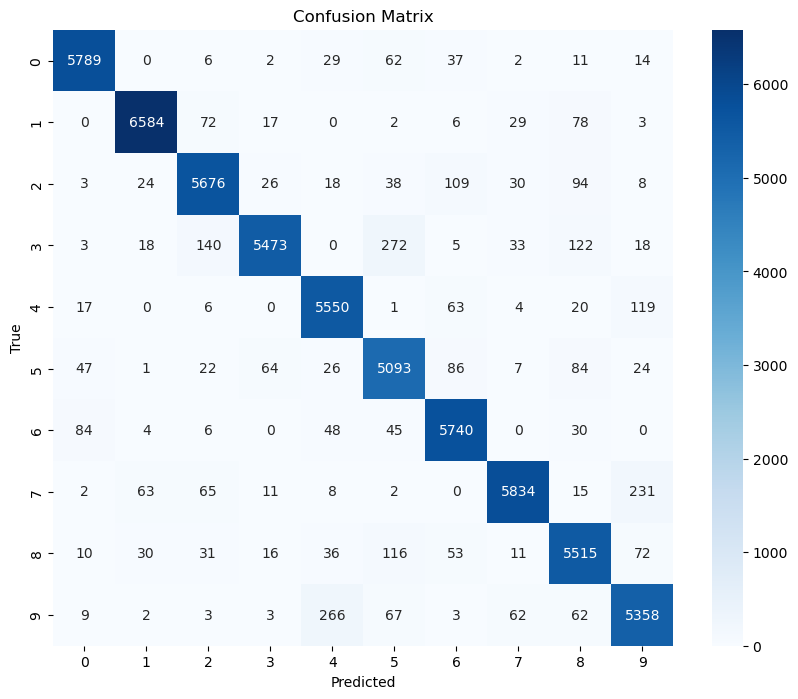

In [38]:
def plot_confusion_matrix(model3, test_loader):
    y_true = []
    y_pred = []
    model3.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model3(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Call this function after training your model
plot_confusion_matrix(model3, test_loader)

### 4.3. Hypothesis 3: The neural network architecture with 4 fully connected layers (128, 128, 64, 10) with tanh Activation and RMSprop Optimizer with dropouts

In [40]:
# Define the neural network architecture
class MLP4(nn.Module):
    def __init__(self):
        super(MLP4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 10)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.tanh(self.fc1(x))
        x = self.dropout1(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout2(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x


# Initialize the neural network
model4 = MLP4()

In [41]:
# Hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 10

In [42]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model4.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model4.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model4(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

print('Finished Training')

Epoch 1/10, Batch 0/938, Loss: 2.3253
Epoch 1/10, Batch 100/938, Loss: 1.6930
Epoch 1/10, Batch 200/938, Loss: 0.9799
Epoch 1/10, Batch 300/938, Loss: 0.7204
Epoch 1/10, Batch 400/938, Loss: 0.6185
Epoch 1/10, Batch 500/938, Loss: 0.9571
Epoch 1/10, Batch 600/938, Loss: 0.5293
Epoch 1/10, Batch 700/938, Loss: 0.3313
Epoch 1/10, Batch 800/938, Loss: 0.5332
Epoch 1/10, Batch 900/938, Loss: 0.5635
Epoch 2/10, Batch 0/938, Loss: 0.5557
Epoch 2/10, Batch 100/938, Loss: 0.6945
Epoch 2/10, Batch 200/938, Loss: 0.6289
Epoch 2/10, Batch 300/938, Loss: 0.5448
Epoch 2/10, Batch 400/938, Loss: 0.8389
Epoch 2/10, Batch 500/938, Loss: 0.6296
Epoch 2/10, Batch 600/938, Loss: 0.4860
Epoch 2/10, Batch 700/938, Loss: 0.4323
Epoch 2/10, Batch 800/938, Loss: 0.6219
Epoch 2/10, Batch 900/938, Loss: 0.4538
Epoch 3/10, Batch 0/938, Loss: 0.2726
Epoch 3/10, Batch 100/938, Loss: 0.5328
Epoch 3/10, Batch 200/938, Loss: 0.6309
Epoch 3/10, Batch 300/938, Loss: 0.4038
Epoch 3/10, Batch 400/938, Loss: 0.4508
Epoch 

In [43]:
# Evaluate the model on train dataset
model4.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: {100 * correct / total:.2f}%')

Accuracy on train set: 94.26%


In [44]:
# Evaluation
model4.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = model4(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

Accuracy on test set: 93.68%


In [45]:
# Visualize a prediction
model4.eval()
predictions = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        break  # We only need one batch for visualization

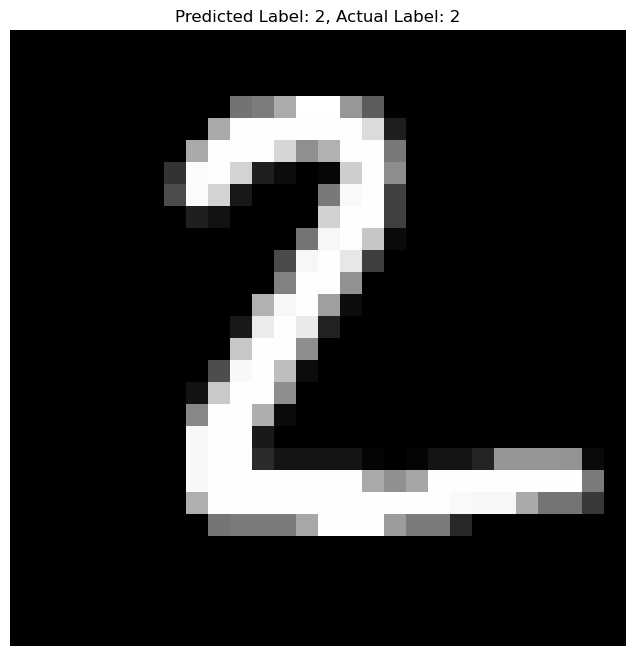

In [46]:
# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.figure(figsize=(8, 8))
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

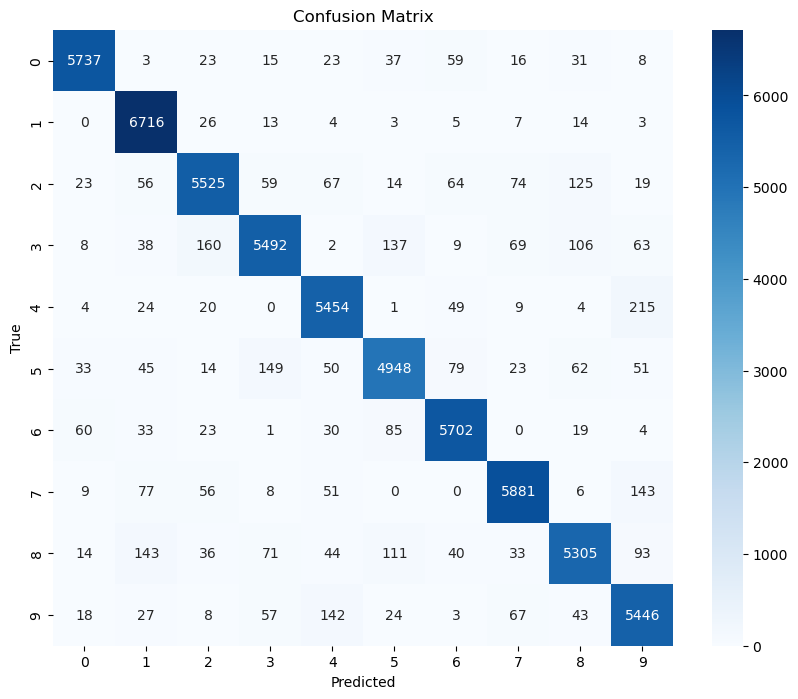

In [47]:
def plot_confusion_matrix(model4, test_loader):
    y_true = []
    y_pred = []
    model4.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model4(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Call this function after training your model
plot_confusion_matrix(model4, test_loader)

### 4.4. Hypothesis 4: The neural network architecture with 4 fully connected layers (128, 128, 64, 10) with tanh Activation and MSELoss Loss and Adam optimizers and no dropouts

In [49]:
# Define the neural network architecture with sigmoid activation
class MLP5(nn.Module):
    def __init__(self):
        super(MLP5, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model5 = MLP5()

In [50]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model5.parameters(), lr=0.001)

In [51]:
# Train the neural network
num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model5.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        batch_size = labels.size(0)  # Get the actual batch size
        labels_one_hot = torch.zeros(batch_size, 10).scatter_(1, labels.unsqueeze(1), 1.0)  # One-hot encode labels

        optimizer.zero_grad()
        outputs = model5(inputs)
        loss = criterion(outputs, labels_one_hot)  # Use the correct batch size labels
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            train_losses.append(running_loss / 100)
            running_loss = 0.0
    
print('Finished Training')

Epoch 1, Batch 100, Loss: 0.0479
Epoch 1, Batch 200, Loss: 0.0269
Epoch 1, Batch 300, Loss: 0.0197
Epoch 1, Batch 400, Loss: 0.0179
Epoch 1, Batch 500, Loss: 0.0157
Epoch 1, Batch 600, Loss: 0.0146
Epoch 1, Batch 700, Loss: 0.0136
Epoch 1, Batch 800, Loss: 0.0130
Epoch 1, Batch 900, Loss: 0.0118
Epoch 2, Batch 100, Loss: 0.0108
Epoch 2, Batch 200, Loss: 0.0113
Epoch 2, Batch 300, Loss: 0.0099
Epoch 2, Batch 400, Loss: 0.0095
Epoch 2, Batch 500, Loss: 0.0091
Epoch 2, Batch 600, Loss: 0.0090
Epoch 2, Batch 700, Loss: 0.0087
Epoch 2, Batch 800, Loss: 0.0084
Epoch 2, Batch 900, Loss: 0.0088
Epoch 3, Batch 100, Loss: 0.0075
Epoch 3, Batch 200, Loss: 0.0068
Epoch 3, Batch 300, Loss: 0.0080
Epoch 3, Batch 400, Loss: 0.0074
Epoch 3, Batch 500, Loss: 0.0069
Epoch 3, Batch 600, Loss: 0.0076
Epoch 3, Batch 700, Loss: 0.0072
Epoch 3, Batch 800, Loss: 0.0071
Epoch 3, Batch 900, Loss: 0.0069
Epoch 4, Batch 100, Loss: 0.0059
Epoch 4, Batch 200, Loss: 0.0060
Epoch 4, Batch 300, Loss: 0.0065
Epoch 4, B

In [52]:
# Evaluate the model on train dataset
model5.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: {100 * correct / total:.2f}%')

Accuracy on train set: 97.98%


In [53]:
# Evaluation
model5.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = model5(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

Accuracy on test set: 96.59%


In [54]:
# Visualize a prediction
model5.eval()
predictions = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        break  # We only need one batch for visualization

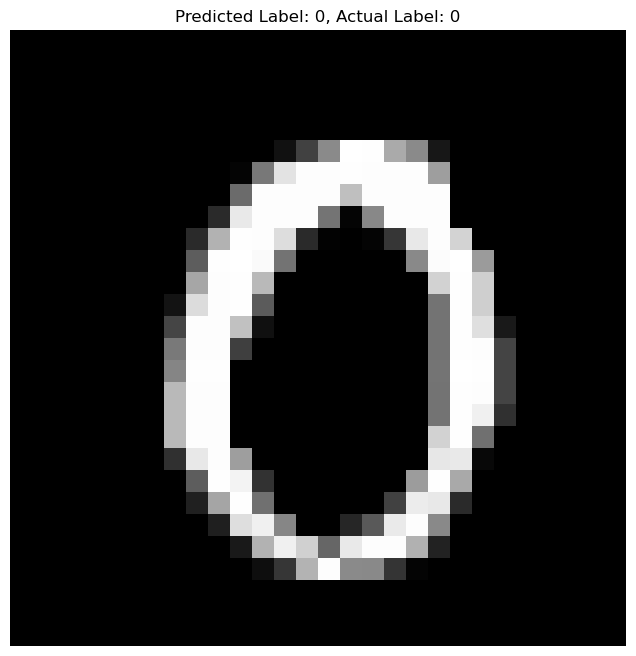

In [55]:
# Get one test image and its label
image, label = images[13], labels[13]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.figure(figsize=(8, 8))
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[13]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

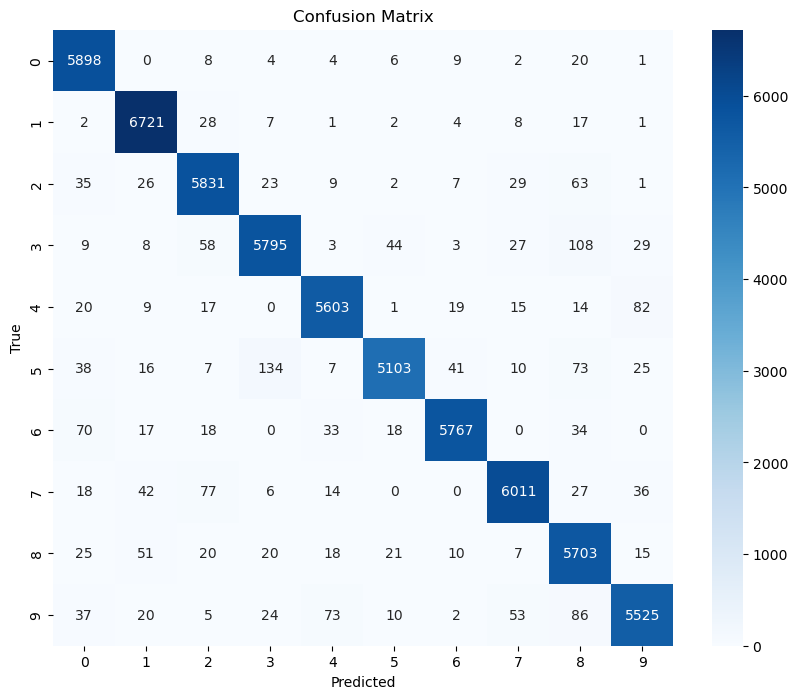

In [56]:
def plot_confusion_matrix(model5, test_loader):
    y_true = []
    y_pred = []
    model5.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model5(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Call this function after training your model
plot_confusion_matrix(model5, test_loader)

### 4.5. Hypothesis 5: The neural network architecture with 4 fully connected layers (128, 128, 64, 10) with Maxout Activation and CrossEntropyLoss Loss and Adadelta optimizers

In [58]:
class Maxout(nn.Module):
    def __init__(self, in_features, out_features, num_pieces):
        super(Maxout, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.num_pieces = num_pieces
        self.linear = nn.Linear(in_features, out_features * num_pieces)

    def forward(self, x):
        x = self.linear(x)
        x = x.view(-1, self.out_features, self.num_pieces)
        x, _ = torch.max(x, dim=2)
        return x

In [59]:
class MLP6(nn.Module):
    def __init__(self):
        super(MLP6, self).__init__()
        self.fc1 = Maxout(28 * 28, 128, num_pieces=3)
        self.fc2 = Maxout(128, 128, num_pieces=3)
        self.fc3 = Maxout(128, 64, num_pieces=3)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

# Initialize the neural network
model6 = MLP6()

In [60]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(model6.parameters())

# Training loop (assuming train_loader is defined)
num_epochs = 5
for epoch in range(num_epochs):
    model6.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model6(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.3358
Epoch 1, Batch 200, Loss: 0.5581
Epoch 1, Batch 300, Loss: 0.4214
Epoch 1, Batch 400, Loss: 0.3596
Epoch 1, Batch 500, Loss: 0.2859
Epoch 1, Batch 600, Loss: 0.2764
Epoch 1, Batch 700, Loss: 0.2675
Epoch 1, Batch 800, Loss: 0.2310
Epoch 1, Batch 900, Loss: 0.2105
Epoch 2, Batch 100, Loss: 0.1991
Epoch 2, Batch 200, Loss: 0.1961
Epoch 2, Batch 300, Loss: 0.1762
Epoch 2, Batch 400, Loss: 0.1772
Epoch 2, Batch 500, Loss: 0.1631
Epoch 2, Batch 600, Loss: 0.1627
Epoch 2, Batch 700, Loss: 0.1469
Epoch 2, Batch 800, Loss: 0.1582
Epoch 2, Batch 900, Loss: 0.1519
Epoch 3, Batch 100, Loss: 0.1106
Epoch 3, Batch 200, Loss: 0.1382
Epoch 3, Batch 300, Loss: 0.1417
Epoch 3, Batch 400, Loss: 0.1270
Epoch 3, Batch 500, Loss: 0.1241
Epoch 3, Batch 600, Loss: 0.1281
Epoch 3, Batch 700, Loss: 0.1029
Epoch 3, Batch 800, Loss: 0.1266
Epoch 3, Batch 900, Loss: 0.1249
Epoch 4, Batch 100, Loss: 0.0791
Epoch 4, Batch 200, Loss: 0.0863
Epoch 4, Batch 300, Loss: 0.0966
Epoch 4, B

In [61]:
# Evaluate the model on train dataset
model6.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model6(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: {100 * correct / total:.2f}%')

Accuracy on train set: 97.89%


In [62]:
# Evaluate the model
model6.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model6(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

Accuracy on test set: 96.65%


In [63]:
# Evaluate the model and store predictions
model6.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model6(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

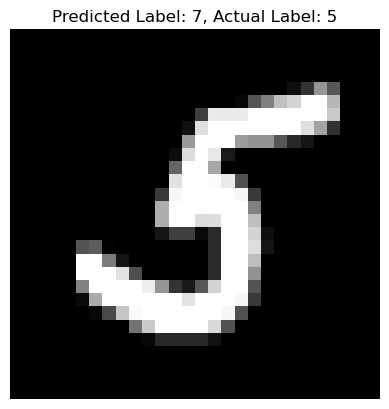

In [64]:
# Get one test image and its label
image, label = images[0], labels[0]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[0]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

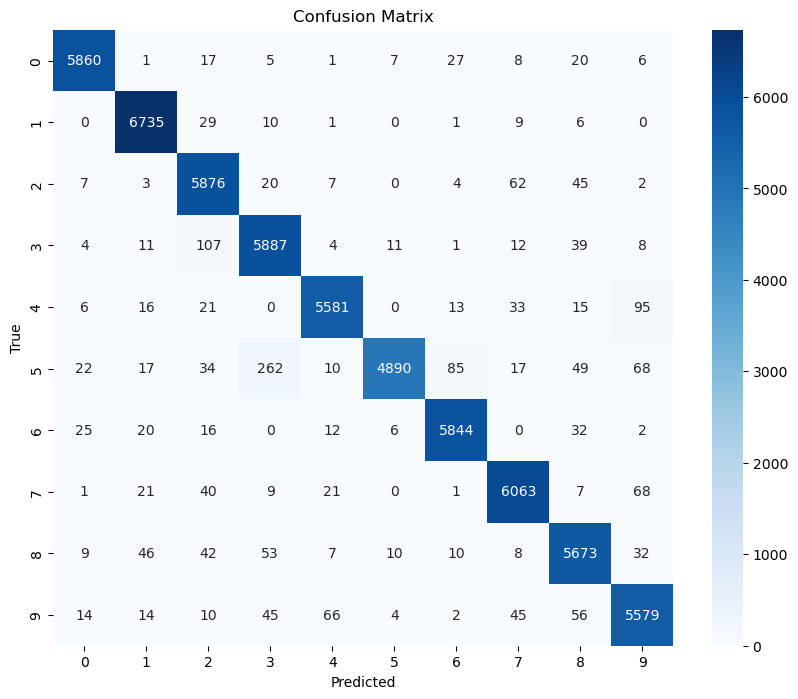

In [65]:
def plot_confusion_matrix(model6, test_loader):
    y_true = []
    y_pred = []
    model6.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model6(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Call this function after training your model
plot_confusion_matrix(model6, test_loader)

1. Default model (MLP2):

- Train accuracy: 97.34%, Test accuracy: 96.21%
  
2. Hypothesis 1 (MLP1):

- Train accuracy: 97.80%, Test accuracy: 96.67%

3. Hypothesis 2 (MLP3):

- Train accuracy: 95.30%, Test accuracy: 94.35%

4. Hypothesis 3 (MLP4):

- Train accuracy: 94.26%, Test accuracy: 93.68%

5. Hypothesis 4 (MLP5):

- Train accuracy: 97.98%, Test accuracy: 96.59%

6. Hypothesis 5 (MLP6):

- Train accuracy: 97.89%, Test accuracy: 96.65%

2. Observations and analysis:

- Performance (based on test accuracy):
Hypothesis 1 (96.67%) ≈ Hypothesis 5 (96.65%) > Hypothesis 4 (96.59%) > Default model (96.21%) > Hypothesis 2 (94.35%) > Hypothesis 3 (93.68%)

- Hypothesis 4 (MLP5) performed better than expected:
Despite using MSELoss, which is unusual for classification tasks, it achieved high accuracy.
The combination of tanh activation and Adam optimizer seems to work well.
The removal of dropout didn't lead to significant overfitting, as the gap between train and test accuracy remains small.

- Hypothesis 5 (MLP6) performed very well:
The use of Maxout activation and Adadelta optimizer proved effective.
It achieved the second-best test accuracy, very close to Hypothesis 1.

- Activation functions:
ReLU (used in MLP1 and MLP2) and Maxout (used in MLP6) seem to perform better than sigmoid (MLP3) and tanh (MLP4).
However, the tanh activation in MLP5 also performed well when combined with Adam optimizer and MSELoss.

- Optimizers:
Adam (used in MLP1, MLP2, and MLP5) and Adadelta (used in MLP6) appear to be more effective than SGD (MLP3) and RMSprop (MLP4) for this task.

- Loss functions:
Surprisingly, MSELoss (used in MLP5) performed well despite being an unconventional choice for classification.
CrossEntropyLoss, used in most other models, is still a solid choice for classification tasks.

- Network depth:
The 4-layer architectures (MLP1, MLP3, MLP4, MLP5, MLP6) generally outperformed the 3-layer architecture (MLP2), suggesting that the additional complexity helps in this case.

- Overfitting:
All models show relatively small gaps between train and test accuracies, indicating good generalization.
The use of dropout in MLP4 resulted in the smallest gap but at the cost of overall performance.

3. Conclusions:

- The best-performing models (Hypothesis 1 and Hypothesis 5) use different activation functions (ReLU and Maxout) but both have 4 layers and use effective optimizers (Adam and Adadelta).
- The choice of optimizer seems to have a significant impact on performance, with Adam and Adadelta showing the best results.
- While CrossEntropyLoss is generally preferred for classification tasks, the success of MSELoss in Hypothesis 4 suggests that unconventional choices can sometimes yield good results.
- The 4-layer architecture consistently outperformed the 3-layer architecture, indicating that the additional complexity is beneficial for this task.
- Dropout, while effective at reducing overfitting, may not always lead to the best overall performance if it reduces the model's capacity too much.